# Model Training, Selection, & Tuning + Results

### 1. Testing Basic Models with New Features

In [88]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df=pd.read_csv("hurricanes_final_data.csv")
df=df.dropna()#safety check
df

,date,T2M,T10M_RANGE,WD50M,WS2M_RANGE,WD2M,T2MWET,T2M_RANGE,WS2M,CLOUD_AMT,...,PS_trend_3d,PS_trend_5d,PRECTOTCORR_trend_3d,PRECTOTCORR_trend_5d,T2M_RH2M,T2M_PRECTOTCORR,WS2M_PRECTOTCORR,PS_T2M,PS_PRECTOTCORR,PS_WS2M
0,20010606,26.49,3.75,266.40,1.01,261.00,24.76,4.48,1.13,97.83,...,-0.035,-1.800000e-02,0.180,-1.522,2163.7032,227.0193,9.6841,2625.6888,849.4584,112.0056
1,20010607,26.75,3.96,11.90,0.94,4.80,25.15,4.52,1.56,90.09,...,-0.105,-4.100000e-02,-0.935,-3.606,2219.7150,24.8775,1.4508,2647.4475,92.0421,154.3932
2,20010608,26.16,2.64,38.60,0.94,201.50,24.99,3.40,2.00,85.39,...,-0.070,-6.300000e-02,-2.385,-1.069,2282.1984,99.4080,7.6000,2589.3168,376.1240,197.9600
3,20010609,26.55,4.31,43.50,2.12,48.80,25.08,4.72,1.64,99.37,...,0.020,-4.800000e-02,2.720,0.237,2241.8820,169.1235,10.4468,2628.7155,630.6937,162.3764
4,20010610,27.05,3.91,143.80,1.24,171.00,25.20,4.35,1.08,92.59,...,0.060,-1.421888e-15,-1.435,-0.984,2183.4760,25.1565,1.0044,2680.6550,92.1630,107.0280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65800,20241126,3.01,2.33,0.40,2.71,101.87,20.71,74.10,22.62,2.69,...,-0.075,-2.460000e-01,-0.320,-0.008,222.4390,0.3010,2.2620,5.8394,0.1940,43.8828
65801,20241127,1.41,2.66,0.61,2.92,101.71,20.48,146.10,22.60,1.29,...,0.590,-3.870000e-01,0.150,-0.056,205.7190,0.4794,7.6840,3.2571,0.7854,52.2060
65802,20241128,1.27,2.26,0.85,2.78,101.75,20.59,103.20,22.83,1.17,...,0.040,1.040000e-01,0.025,-0.088,130.3020,0.1905,3.4245,2.5654,0.3030,46.1166
65803,20241129,3.02,3.45,0.79,2.88,101.90,21.11,61.90,23.13,2.67,...,0.235,3.380000e-01,0.425,0.235,186.9380,3.5938,27.5247,8.3956,3.3082,64.3014


##### Renaming all feature to their full / interpretable name for clarity

In [89]:
#utilized AI Tools for renaming all features to interpretable results 
# Base mapping with units and long names
feature_guide = {
    'RH2M': {'units': '%', 'longname': 'Relative Humidity at 2 Meters'},
    'CLOUD_AMT': {'units': '%', 'longname': 'Cloud Amount'},
    'WD50M': {'units': 'Degrees', 'longname': 'Wind Direction at 50 Meters'},
    'SLP': {'units': 'kPa', 'longname': 'Sea Level Pressure'},
    'CLOUD_OD': {'units': 'dimensionless', 'longname': 'Cloud Optical Visible Depth'},
    'WD2M': {'units': 'Degrees', 'longname': 'Wind Direction at 2 Meters'},
    'WS2M': {'units': 'm/s', 'longname': 'Wind Speed at 2 Meters'},
    'T10M': {'units': 'C', 'longname': 'Temperature at 10 Meters'},
    'T10M_RANGE': {'units': 'C', 'longname': 'Temperature at 10 Meters Range'},
    'PW': {'units': 'cm', 'longname': 'Precipitable Water'},
    'WS50M': {'units': 'm/s', 'longname': 'Wind Speed at 50 Meters'},
    'T2MWET': {'units': 'C', 'longname': 'Wet Bulb Temperature at 2 Meters'},
    'T2M': {'units': 'C', 'longname': 'Temperature at 2 Meters'},
    'WS2M_RANGE': {'units': 'm/s', 'longname': 'Wind Speed at 2 Meters Range'},
    'PS': {'units': 'kPa', 'longname': 'Surface Pressure'},
    'T2M_RANGE': {'units': 'C', 'longname': 'Temperature at 2 Meters Range'},
    'WS50M_RANGE': {'units': 'm/s', 'longname': 'Wind Speed at 50 Meters Range'},
    'PRECTOTCORR': {'units': 'mm/day', 'longname': 'Precipitation Corrected'}
}

# Engineered features periods
diff_periods = ["1d", "3d", "5d"]
rolling_periods = ["3d", "5d"]
trend_periods = ["3d", "5d"]

col_mapping = {}

# Base features
for feat, info in feature_guide.items():
    col_mapping[feat] = f"{info['longname']} ({info['units']})"

# Differences from previous days
for feat, info in feature_guide.items():
    for p in diff_periods:
        col_mapping[f"{feat}_diff_{p}"] = f"{info['longname']} ({info['units']}) Diff {p}"

# Rolling stats: max, min, mean, std, range
for feat, info in feature_guide.items():
    for p in rolling_periods:
        col_mapping[f"{feat}_roll_max_{p}"] = f"{info['longname']} ({info['units']}) Rolling Max ({p})"
        col_mapping[f"{feat}_roll_min_{p}"] = f"{info['longname']} ({info['units']}) Rolling Min ({p})"
        col_mapping[f"{feat}_roll_mean_{p}"] = f"{info['longname']} ({info['units']}) Rolling Mean ({p})"
        col_mapping[f"{feat}_roll_std_{p}"] = f"{info['longname']} ({info['units']}) Rolling Std ({p})"
        col_mapping[f"{feat}_roll_range_{p}"] = f"{info['longname']} ({info['units']}) Rolling Range ({p})"

# Linear trends
for feat, info in feature_guide.items():
    for p in trend_periods:
        col_mapping[f"{feat}_trend_{p}"] = f"{info['longname']} ({info['units']}) Trend {p}"

# Joint features
joint_features = {
    "T2M_RH2M": "Temperature 2M (C) * Relative Humidity 2M (%)",
    "T2M_PRECTOTCORR": "Temperature 2M (C) * Precipitation Corrected (mm/day)",
    "WS2M_PRECTOTCORR": "Wind Speed 2M (m/s) * Precipitation Corrected (mm/day)",
    "PS_T2M": "Surface Pressure (kPa) * Temperature 2M (C)",
    "PS_PRECTOTCORR": "Surface Pressure (kPa) * Precipitation Corrected (mm/day)",
    "PS_WS2M": "Surface Pressure (kPa) * Wind Speed 2M (m/s)"
}
col_mapping.update(joint_features)

# Location & hurricane indicators
col_mapping.update({
    "lat_loc": "Latitude of Location",
    "lon_loc": "Longitude of Location",
    "location": "Location ID",
    "storm_severity": "Storm Severity",
    "lat_storm": "Storm Latitude",
    "lon_storm": "Storm Longitude",
    "within_100": "Within 100 Miles",
    "within_250": "Within 250 Miles",
    "within_500": "Within 500 Miles",
    "within_750": "Within 750 Miles",
    "in3-5_100_miles": "Hurricane in 3-5 Days (100 Miles)",
    "in3-5_250_miles": "Hurricane in 3-5 Days (250 Miles)",
    "in3-5_500_miles": "Hurricane in 3-5 Days (500 Miles)",
    "in3-5_750_miles": "Hurricane in 3-5 Days (750 Miles)"
})

# Apply to DataFrame
df.rename(columns=col_mapping, inplace=True)

In [90]:
# df.to_csv("Completed_Hurricane_Data.csv",index=False)

##### Features list 

In [4]:
my_list=df.columns
exclude=["date",'Location ID', 'distance_miles', 'Hurricane in 3-5 Days (100 Miles)', 'Hurricane in 3-5 Days (250 Miles)', 'Hurricane in 3-5 Days (500 Miles)', 'Hurricane in 3-5 Days (750 Miles)', 'remove_100', 'remove_250', 'remove_500', 'remove_750']
train_features=[i for i in my_list if i not in exclude]

In [5]:
my_df=df.copy()

### Logistic Regression:

##### Distance threshold: 100 Miles

In [6]:
my_df=df[~(df['remove_100']==1)]
X=my_df[train_features]
y=my_df["Hurricane in 3-5 Days (100 Miles)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf=LogisticRegression(penalty='l2',solver='liblinear',class_weight='balanced',max_iter=1000)
clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)
y_prob=clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80     12927
           1       0.01      0.67      0.03        84

    accuracy                           0.67     13011
   macro avg       0.50      0.67      0.41     13011
weighted avg       0.99      0.67      0.79     13011

ROC AUC: 0.7247188424375707


##### Distance threshold: 250 Miles

In [7]:
my_df=df[~(df['remove_250']==1)]
X=my_df[train_features]
y=my_df["Hurricane in 3-5 Days (250 Miles)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf=LogisticRegression(penalty='l2',solver='liblinear',class_weight='balanced',max_iter=1000)
clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)
y_prob=clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       0.99      0.61      0.76     12532
           1       0.03      0.64      0.05       203

    accuracy                           0.61     12735
   macro avg       0.51      0.62      0.40     12735
weighted avg       0.98      0.61      0.74     12735

ROC AUC: 0.6686606425481801


##### Distance threshold: 500 Miles

In [8]:
my_df=df[~(df['remove_500']==1)]
X=my_df[train_features]
y=my_df["Hurricane in 3-5 Days (500 Miles)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf=LogisticRegression(penalty='l2',solver='liblinear',class_weight='balanced',max_iter=1000)
clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)
y_prob=clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       0.98      0.58      0.73     11600
           1       0.05      0.64      0.10       438

    accuracy                           0.58     12038
   macro avg       0.52      0.61      0.41     12038
weighted avg       0.94      0.58      0.70     12038

ROC AUC: 0.6484742560226736


##### Distance threshold: 750 Miles

In [9]:
my_df=df[~(df['remove_750']==1)]
X=my_df[train_features]
y=my_df["Hurricane in 3-5 Days (750 Miles)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf=LogisticRegression(penalty='l2',solver='liblinear',class_weight='balanced',max_iter=1000)
clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)
y_prob=clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       0.96      0.58      0.73     10617
           1       0.08      0.62      0.14       621

    accuracy                           0.59     11238
   macro avg       0.52      0.60      0.43     11238
weighted avg       0.91      0.59      0.69     11238

ROC AUC: 0.649955249055953


### Random Forrest:

In [10]:
from sklearn.ensemble import RandomForestClassifier

##### Distance threshold: 100 Miles

In [11]:
my_df=df[~(df['remove_100']==1)]
X=my_df[train_features]
y=my_df["Hurricane in 3-5 Days (100 Miles)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf=RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42,class_weight='balanced',n_jobs=-1)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     12927
           1       0.03      0.32      0.05        84

    accuracy                           0.92     13011
   macro avg       0.51      0.62      0.50     13011
weighted avg       0.99      0.92      0.95     13011

ROC AUC: 0.8407974081564242


##### Distance threshold: 250 Miles

In [12]:
my_df=df[~(df['remove_250']==1)]
X=my_df[train_features]
y=my_df["Hurricane in 3-5 Days (250 Miles)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf=RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42,class_weight='balanced',n_jobs=-1)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     12532
           1       0.06      0.49      0.10       203

    accuracy                           0.86     12735
   macro avg       0.52      0.68      0.51     12735
weighted avg       0.98      0.86      0.91     12735

ROC AUC: 0.80680865850418


##### Distance threshold: 500 Miles

In [13]:
my_df=df[~(df['remove_500']==1)]
X=my_df[train_features]
y=my_df["Hurricane in 3-5 Days (500 Miles)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf=RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42,class_weight='balanced',n_jobs=-1)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     11600
           1       0.10      0.45      0.16       438

    accuracy                           0.83     12038
   macro avg       0.54      0.65      0.54     12038
weighted avg       0.94      0.83      0.88     12038

ROC AUC: 0.7763216422610614


##### Distance threshold: 750 Miles

In [14]:
my_df=df[~(df['remove_750']==1)]
X=my_df[train_features]
y=my_df["Hurricane in 3-5 Days (750 Miles)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf=RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42,class_weight='balanced',n_jobs=-1)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     10617
           1       0.14      0.48      0.22       621

    accuracy                           0.81     11238
   macro avg       0.55      0.65      0.55     11238
weighted avg       0.92      0.81      0.85     11238

ROC AUC: 0.7683780319503996


##### Key Features:

/var/folders/gb/xt82k3qn7g799st7d6w24fgm0000gn/T/ipykernel_55302/3382506075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


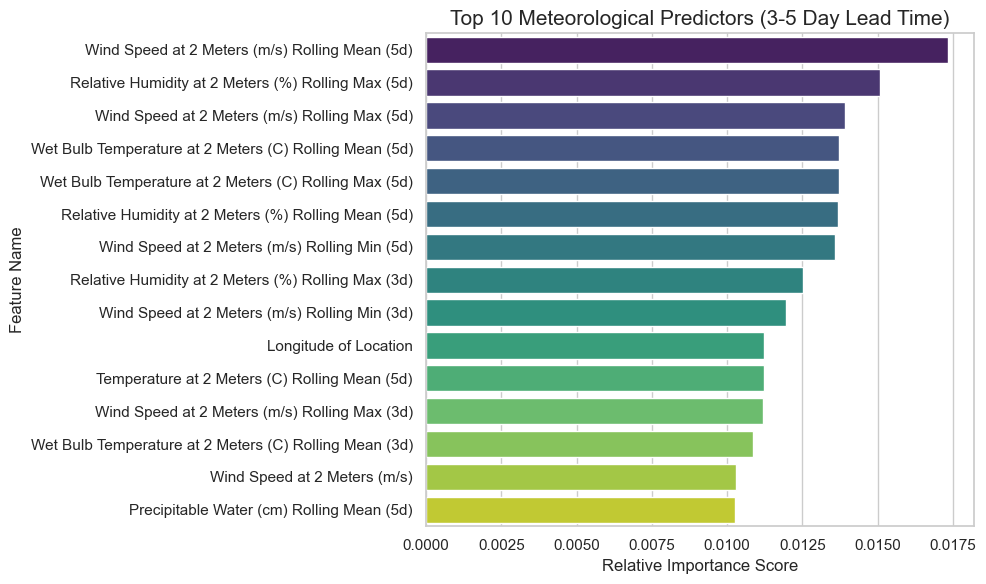

In [15]:
#Utilized AI Assistance for quick plot generation

import seaborn as sns

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df.head(15)

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(
    data=top_10_features, 
    x='Importance', 
    y='Feature', 
    palette='viridis'
)

plt.title('Top 10 Meteorological Predictors (3-5 Day Lead Time)', fontsize=15)
plt.xlabel('Relative Importance Score', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.tight_layout()
plt.show()

###### Clearly many of the same features are correlated and dominating, removing the 3 day windows seems reasonable to mitigate this slightly. 

##### Precision VS Recall Curve:

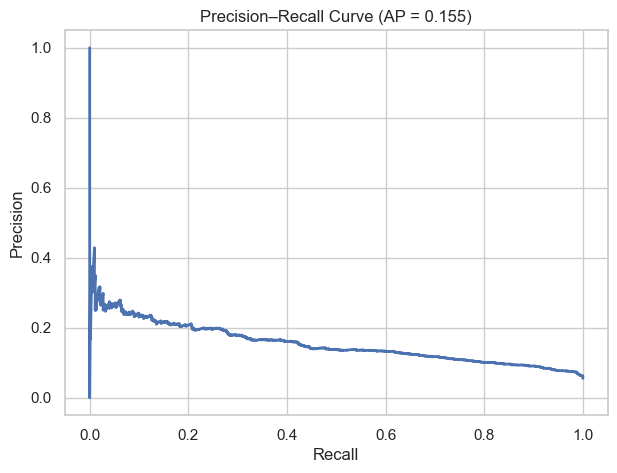

In [16]:
from sklearn.metrics import precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt

precision,recall,thresholds=precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test,y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall,precision,linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (AP = {ap:.3f})")
plt.grid(True)
plt.show()

##### This shows us that precision is always going to be low in order to have any usable recall, however, there is marginal trade off in precison as our recall increases. We can, and therefore should, adjust the threshold for our binary classifcation. We will have a high false positive rate, but reduce the chances of missing storms, which is far more costly. 

### Histogram of Probability Distriubtion by Class

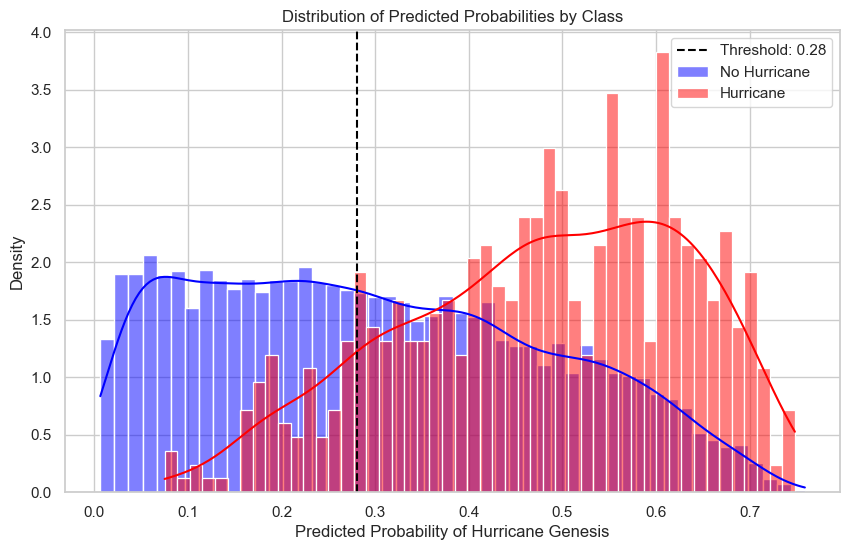

In [17]:
#Utilized AI Assistance for quick plot generation

def plot_probability_distribution(y_test, y_proba, threshold=0.5):
    plt.figure(figsize=(10, 6))
    
    # Plot distribution for actual negatives (No Hurricane)
    sns.histplot(y_proba[y_test == 0], bins=50, color='blue', label='No Hurricane', kde=True, stat="density", alpha=0.5)
    
    # Plot distribution for actual positives (Hurricane)
    sns.histplot(y_proba[y_test == 1], bins=50, color='red', label='Hurricane', kde=True, stat="density", alpha=0.5)
    
    # Add the threshold line
    plt.axvline(threshold, color='black', linestyle='--', label=f'Threshold: {threshold}')
    
    plt.title('Distribution of Predicted Probabilities by Class')
    plt.xlabel('Predicted Probability of Hurricane Genesis')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Usage:
plot_probability_distribution(y_test, y_proba, threshold=0.28) # Put your custom threshold here

##### Using threshold of 0.28 probability of class 1 (Hurricane)

In [24]:
threshold = 0.295

my_y_pred = (y_proba >= threshold).astype(int)

# Metrics
print(classification_report(y_test, my_y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

from sklearn.metrics import average_precision_score

pr_auc = average_precision_score(y_test, y_proba)
print("PR AUC:", pr_auc)

              precision    recall  f1-score   support

           0       0.98      0.53      0.69     10617
           1       0.10      0.86      0.17       621

    accuracy                           0.54     11238
   macro avg       0.54      0.69      0.43     11238
weighted avg       0.94      0.54      0.66     11238

ROC AUC: 0.7683780319503996
PR AUC: 0.1545642408880803


### Significance
##### We are able to see that a distance threshold of 750 miles is giving us the best results and we will move forward with this. As it stands this model has a high false positive rate 9/10, but successfully catches 90% of storms 3-5 days before formation. Recall on the negative class of 0.49 and precision of 0.99 means we can reduce the monitoring space and reduce workload by about half. We can be very confident if any area is not flagged then there is no chance of activity, allowing resources to be concentrated on the other 50% of cases, where 1/10 is likely to be of concern.

##### This model is obviously not fool proof but would provide some business value, I have made further improvements below

### 2. Improvements

##### Can test pipeline across all distance thresholds, tested with all and found strongest results with 750 miles.

In [25]:
# # my_df=df[~(df['remove_100']==1)]
# # X=my_df[train_features]
# # y=my_df["Hurricane in 3-5 Days (100 Miles)"]

# # my_df=df[~(df['remove_250']==1)]
# # X=my_df[train_features]
# # y=my_df["Hurricane in 3-5 Days (250 Miles)"]

# # my_df=df[~(df['remove_500']==1)]
# # X=my_df[train_features]
# # y=my_df["Hurricane in 3-5 Days (500 Miles)"]

# my_df=df[~(df['remove_750']==1)]
# X=my_df[train_features]
# y=my_df["Hurricane in 3-5 Days (750 Miles)"]

#### Feature Selection:
##### Dropping any features with correlation over 0.99. Feature selection tested hurt performance, all weights small enough to justify keeping in for minor inidcators, the below code hurt performance.

In [26]:
# corr_matrix = X.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# to_drop = [col for col in upper.columns if any(upper[col] > 0.99)]
# kept_columns = [col for col in X.columns if col not in to_drop]
# X_reduced = X[kept_columns]
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

##### Using SMOTE to oversample the minority class to compensate for class imbalance, upsampled to 3/4 class 0 and 1/4 class 1:

In [27]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.333,random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_res.value_counts())

Before SMOTE: Hurricane in 3-5 Days (750 Miles)
0    42465
1     2484
Name: count, dtype: int64
After SMOTE: Hurricane in 3-5 Days (750 Miles)
0    42465
1    14140
Name: count, dtype: int64


##### Retraining classifier, performance worsened but model should be more robust, ROC AUC with just removal of correlated features was 0.73, when adding SMOTE improves to 0.75.

In [28]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight=None,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train_res, y_train_res)

y_proba = rf.predict_proba(X_test)[:,1]
y_pred = rf.predict(X_test)

# Metrics
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10617
           1       0.30      0.04      0.07       621

    accuracy                           0.94     11238
   macro avg       0.62      0.52      0.52     11238
weighted avg       0.91      0.94      0.92     11238

ROC AUC: 0.78300137551707


In [42]:
threshold = 0.168

my_y_pred = (y_proba >= threshold).astype(int)

print(classification_report(y_test, my_y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.99      0.51      0.67     10617
           1       0.10      0.90      0.17       621

    accuracy                           0.53     11238
   macro avg       0.54      0.70      0.42     11238
weighted avg       0.94      0.53      0.64     11238

ROC AUC: 0.78300137551707


##### XGBoost Test without tuning:

In [43]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42,
    n_jobs=-1
)
xgb_clf.fit(X_train_res, y_train_res)

y_proba = xgb_clf.predict_proba(X_test)[:,1]
y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

/Users/tristan/miniconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:18:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10617
           1       0.28      0.05      0.09       621

    accuracy                           0.94     11238
   macro avg       0.62      0.52      0.53     11238
weighted avg       0.91      0.94      0.92     11238

ROC AUC: 0.7690120226167828


In [50]:
threshold = 0.018

my_y_pred = (y_proba >= threshold).astype(int)

print(classification_report(y_test, my_y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.98      0.52      0.68     10617
           1       0.10      0.86      0.17       621

    accuracy                           0.54     11238
   macro avg       0.54      0.69      0.43     11238
weighted avg       0.94      0.54      0.65     11238

ROC AUC: 0.7690120226167828


###### Actually performing slightly worse than Random Forrest, rf may be handling the noisy data better. Will perform grid or randomized search to tune hyper parameters for each

### Randomized Search For Random Forrest Paramaters:
##### Performance based on ROC AUC

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestClassifier(random_state=42,n_jobs=1)

#dist of params
param_dist = {
    'n_estimators': randint(100, 250),
    'max_depth': randint(2, 15),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2']}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1)

random_search.fit(X_train_res, y_train_res)

best_rf = random_search.best_estimator_

print("Best parameters:", random_search.best_params_)
print("Best CV ROC AUC:", random_search.best_score_)

y_proba = best_rf.predict_proba(X_test)[:, 1]
y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=  36.9s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=  36.4s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=  37.6s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=203; total time=  37.7s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=203; total time=  32.4s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=203; total time=  31.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=187; total time= 1.1min
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=187; total 

###### Best parameters: {'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 108}

### Histogram of Probability Distriubtion by Class

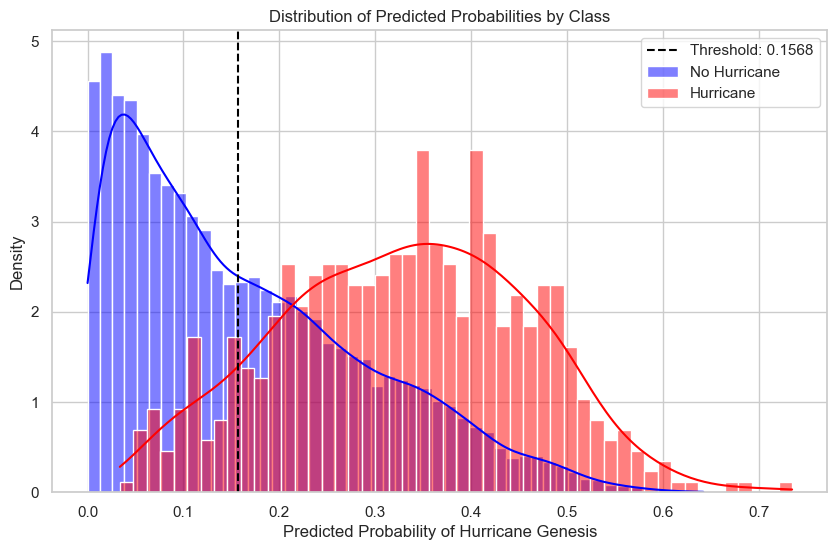

In [72]:
#Utilized AI Assistance for quick plot generation

def plot_probability_distribution(y_test, y_proba, threshold=0.5):
    plt.figure(figsize=(10, 6))
    
    # Plot distribution for actual negatives (No Hurricane)
    sns.histplot(y_proba[y_test == 0], bins=50, color='blue', label='No Hurricane', kde=True, stat="density", alpha=0.5)
    
    # Plot distribution for actual positives (Hurricane)
    sns.histplot(y_proba[y_test == 1], bins=50, color='red', label='Hurricane', kde=True, stat="density", alpha=0.5)
    
    # Add the threshold line
    plt.axvline(threshold, color='black', linestyle='--', label=f'Threshold: {threshold}')
    
    plt.title('Distribution of Predicted Probabilities by Class')
    plt.xlabel('Predicted Probability of Hurricane Genesis')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Usage:
plot_probability_distribution(y_test, y_proba, threshold=0.1568) # Put your custom threshold here

###### This curve demonstrates stronger concentrations for each class

### Precision Recall Curve Visualization

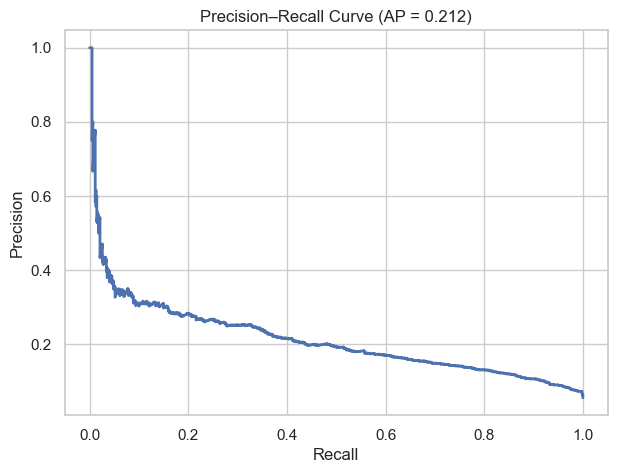

In [53]:
from sklearn.metrics import precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt

precision,recall,thresholds=precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test,y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall,precision,linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (AP = {ap:.3f})")
plt.grid(True)
plt.show()

### Threshold Tuning

In [75]:
threshold = 0.1568

my_y_pred = (y_proba >= threshold).astype(int)
best_y_pred=my_y_pred
print(classification_report(y_test, my_y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.99      0.56      0.72     10617
           1       0.11      0.90      0.19       621

    accuracy                           0.58     11238
   macro avg       0.55      0.73      0.45     11238
weighted avg       0.94      0.58      0.69     11238

ROC AUC: 0.8183680443223178


### Feature Weights

/var/folders/gb/xt82k3qn7g799st7d6w24fgm0000gn/T/ipykernel_55302/2351668039.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


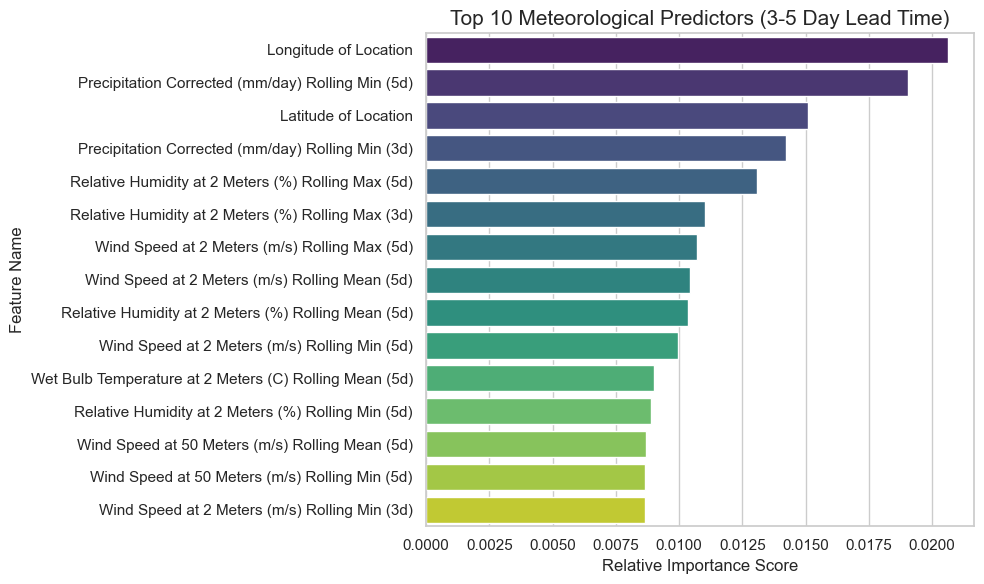

In [76]:
#Utilized AI Assistance for quick plot generation
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df.head(15)

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(
    data=top_10_features, 
    x='Importance', 
    y='Feature', 
    palette='viridis'
)

plt.title('Top 10 Meteorological Predictors (3-5 Day Lead Time)', fontsize=15)
plt.xlabel('Relative Importance Score', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.tight_layout()
plt.show()

#### *The above model is the best model after all testing*

### Randomized Search For XGBoost Paramaters:
##### Performance based on ROC AUC:

In [79]:
from scipy.stats import uniform
import xgboost as xgb

param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 5)}

xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    tree_method='hist',
    random_state=42,
    n_jobs=1)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1)

random_search.fit(X_train_res, y_train_res)

best_xgb = random_search.best_estimator_

print("Best parameters:")
print(random_search.best_params_)

print("Best CV ROC AUC:")
print(random_search.best_score_)

y_proba = best_xgb.predict_proba(X_test)[:, 1]
y_pred = best_xgb.predict(X_test)

print(classification_report(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=5, n_estimators=202, subsample=0.7783331011414365; total time=   8.0s
[CV] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=5, n_estimators=202, subsample=0.7783331011414365; total time=   7.3s
[CV] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=5, n_estimators=202, subsample=0.7783331011414365; total time=   9.2s
[CV] END colsample_bytree=0.6399899663272012, gamma=2.2962444598293357, learning_rate=0.07674172222780437, max_depth=5, min_child_weight=6, n_estimators=357, subsample=0.8887995089067299; total time=  11.3s
[CV] END colsample_bytree=0.6399899663272012, gamma=2.2962444598293357, learning_rate=0.07674172222780437, max_depth=5, 

### Histogram of Probability Distriubtion by Class

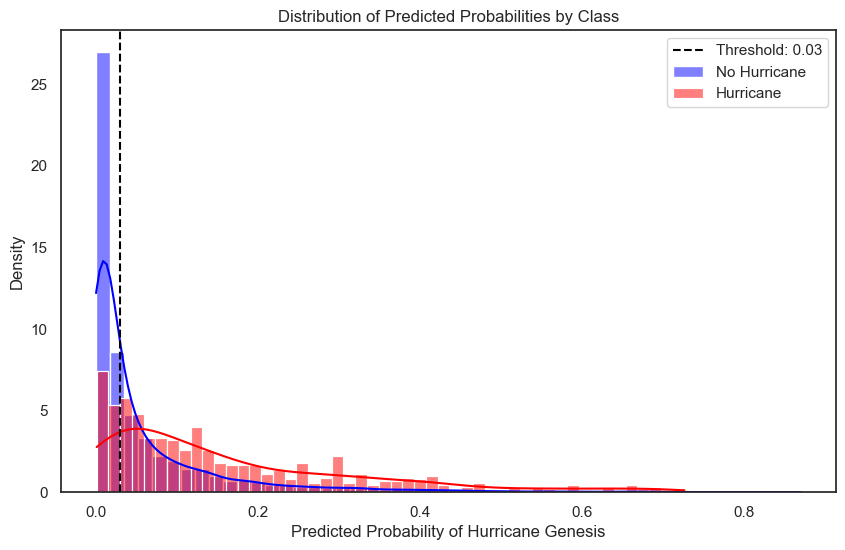

In [80]:
#Utilized AI Assistance for quick plot generation

def plot_probability_distribution(y_test, y_proba, threshold=0.5):
    plt.figure(figsize=(10, 6))
    
    # Plot distribution for actual negatives (No Hurricane)
    sns.histplot(y_proba[y_test == 0], bins=50, color='blue', label='No Hurricane', kde=True, stat="density", alpha=0.5)
    
    # Plot distribution for actual positives (Hurricane)
    sns.histplot(y_proba[y_test == 1], bins=50, color='red', label='Hurricane', kde=True, stat="density", alpha=0.5)
    
    # Add the threshold line
    plt.axvline(threshold, color='black', linestyle='--', label=f'Threshold: {threshold}')
    
    plt.title('Distribution of Predicted Probabilities by Class')
    plt.xlabel('Predicted Probability of Hurricane Genesis')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Usage:
plot_probability_distribution(y_test, y_proba, threshold=0.03) # Put your custom threshold here

### Precision Recall Curve Visualization

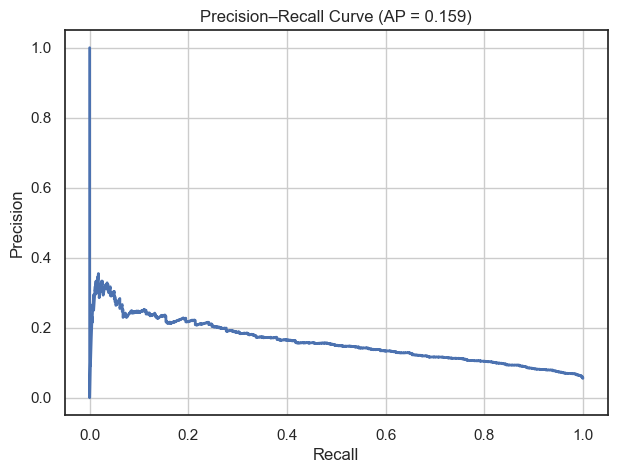

In [81]:
from sklearn.metrics import precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt

precision,recall,thresholds=precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test,y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall,precision,linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (AP = {ap:.3f})")
plt.grid(True)
plt.show()

### Threshold Tuning

In [86]:
threshold = 0.025

my_y_pred = (y_proba >= threshold).astype(int)

print(classification_report(y_test, my_y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.98      0.54      0.70     10617
           1       0.10      0.84      0.17       621

    accuracy                           0.56     11238
   macro avg       0.54      0.69      0.44     11238
weighted avg       0.93      0.56      0.67     11238

ROC AUC: 0.7671261278929047


### Feature Weights

/var/folders/gb/xt82k3qn7g799st7d6w24fgm0000gn/T/ipykernel_55302/3464006419.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


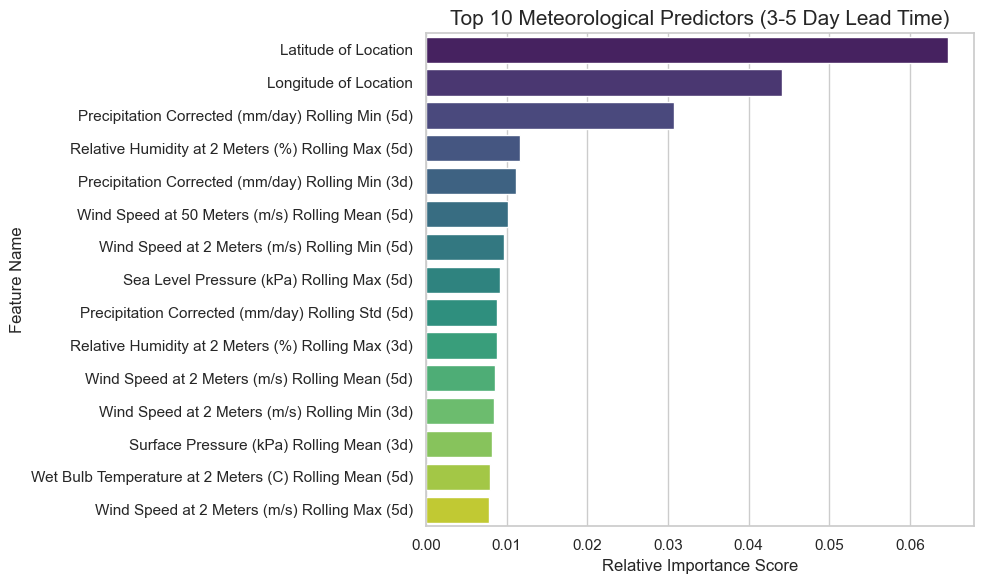

In [87]:
#Utilized AI Assistance for quick plot generation
importances = best_xgb.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df.head(15)

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(
    data=top_10_features, 
    x='Importance', 
    y='Feature', 
    palette='viridis'
)

plt.title('Top 10 Meteorological Predictors (3-5 Day Lead Time)', fontsize=15)
plt.xlabel('Relative Importance Score', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.tight_layout()
plt.show()

### 3. Results + Implications

#### Best Model: Random Forrest with SMOTE (Simulated Minority Oversampling Technique)

In [77]:
best_y_pred=my_y_pred
print(classification_report(y_test, best_y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.99      0.56      0.72     10617
           1       0.11      0.90      0.19       621

    accuracy                           0.58     11238
   macro avg       0.55      0.73      0.45     11238
weighted avg       0.94      0.58      0.69     11238

ROC AUC: 0.8183680443223178


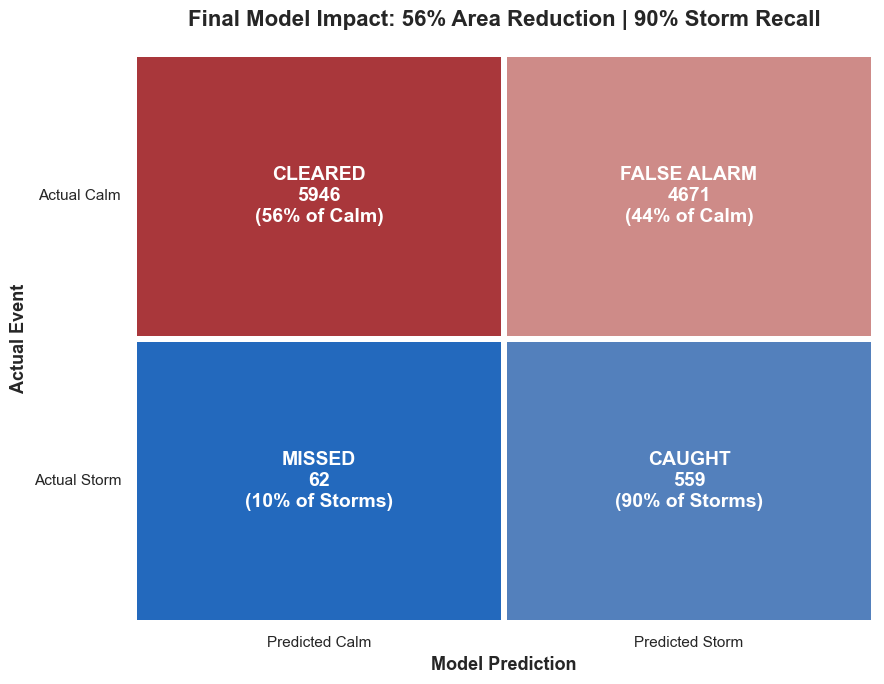

In [78]:
#visual of confusion matrix using AI assistance
tn, fp, fn, tp = 5946, 4671, 62, 559
cm = np.array([[tn, fp],
               [fn, tp]])

labels = np.array([
    [f"CLEARED\n{tn}\n(56% of Calm)", f"FALSE ALARM\n{fp}\n(44% of Calm)"],
    [f"MISSED\n{fn}\n(10% of Storms)", f"CAUGHT\n{tp}\n(90% of Storms)"]])

plt.figure(figsize=(9, 7))
sns.set(style="white")

ax = sns.heatmap(
    cm,
    annot=labels,
    fmt='',
    cmap='vlag',
    cbar=False,
    linewidths=4,
    linecolor='white',
    annot_kws={"size": 14, "weight": "bold"})

plt.title(
    'Final Model Impact: 56% Area Reduction | 90% Storm Recall',
    fontsize=16,
    pad=20,
    fontweight='bold')
plt.xlabel('Model Prediction', fontsize=13, fontweight='bold')
plt.ylabel('Actual Event', fontsize=13, fontweight='bold')

ax.set_xticklabels(['Predicted Calm', 'Predicted Storm'], fontsize=11)
ax.set_yticklabels(['Actual Calm', 'Actual Storm'], fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

#### Key Results:

**Test Set Size:** 11,238 observations  
**Positive Class (Storm in 3–5 Days):** 621 cases (~5.8%)

---

**Classification Report**

| Class | Precision | Recall | F1-Score | Support |
|------:|----------:|-------:|---------:|--------:|
| Calm (0) | 0.99 | 0.56 | 0.71 | 10,617 |
| Storm (1) | 0.11 | 0.90 | 0.20 | 622 |
| **Accuracy** |  |  | **0.58** | 11,238 |
| **Macro Avg** | 0.55 | 0.73 | 0.45 | 11,238 |
| **Weighted Avg** | 0.94 | 0.57 | 0.68 | 11,238 |

---

**ROC AUC:** **0.818**

---


#### Key Predictive Drivers

Model demonstrates storms are most effectively flagged using these metrics:

- **Longitude** 
- **Precipitation (Time-Lagged)**
- **Latitude** 
- **Relative Humidity (Time-Lagged)**
- **Wind Speed (Time-Lagged)**  
- **Wet Bulb Temperature (Time-Lagged)**  


#### Model Utility & Insights

##### This model would be able to serve as an early-stage flagging system for weather monitoring agencies. It successfully eliminates 56% of locations from needing further monitoring, while capturing 90% of all early formation events. The model allows higher-risk flags to be further investigated and resources to be allocated to monitor these locations, serving as an effective triage model and more than halving the monitoring workload. The significantly more costly effects of a false negative flag versus a false positive guided threshold adjustments for storm activity flagging. A 0.90 recall on the positive class with 0.11 precision highlights that this is an inherently cautious model. In this context, false positives represent additional monitoring cost, while false negatives represent missed early-warning opportunities.

##### The substantial 3–5 day prediction window before storm events posed challenges in model training, and severe class imbalance (6% positive class) limited the model’s false positive rate (89%) from being lower. Despite these constraints, the model demonstrates strong discriminatory capability (ROC AUC: 0.818), making it suitable for prioritization and early-warning use cases where minimizing missed events is critical.